In [1]:
# Importing the libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

- `subplots()`: Create multiple plots within a single figure to compare and graph.
- Returns two objects:
    - `fig` - represents the entire figure window that will contain all the subplots.
    - `ax` - either a single axis object (for a single subplot) or an array of axis objects (for multiple subplots).
- Arguments:
    - `nrows` and `ncols` determine the number of rows and columns of subplots, respectively.
    - `sharex` and `sharey` control whether the x-axes or y-axes should be shared among subplots.
- Syntax: `fig, ax = plt.subplots(nrows, ncols)`
- E.g. `fig, ax = plt.subplots(1,2)` - Creates a figure with 1 row and 2 columns of subplots.

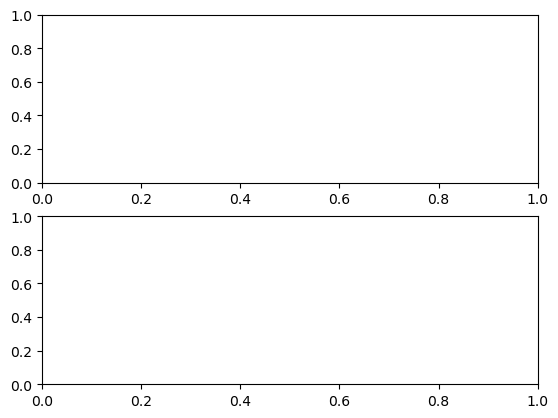

In [16]:
fig, ax = plt.subplots(2,1)

Using subplots with a mix of pandas an plt

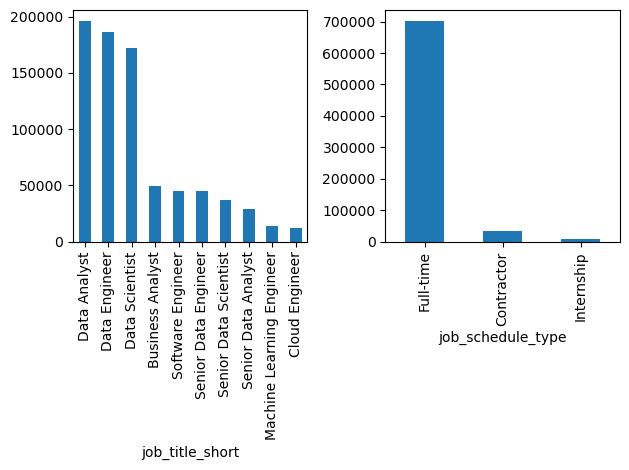

In [23]:
fig, ax = plt.subplots(1,2)

# using pandas
df['job_title_short'].value_counts().plot(kind= 'bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar',ax=ax[1])

plt.tight_layout()

Using subplots with plt

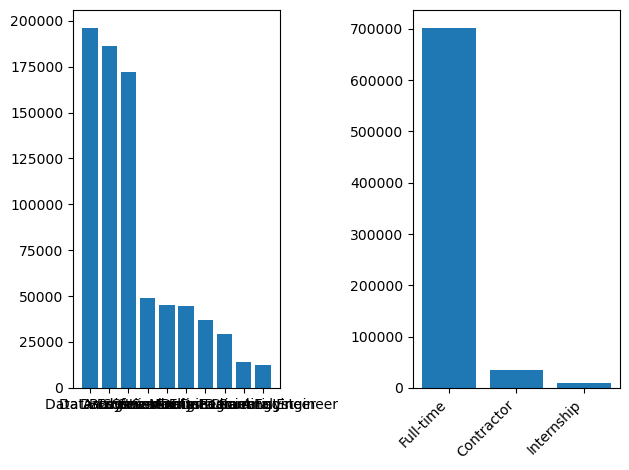

In [39]:
fig,ax = plt.subplots(1,2)

# plt you specify the index and the column
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
plt.xticks(rotation= 45, ha = 'right')

ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
plt.xticks(rotation= 45)
plt.tight_layout()

`tight_layout()`: automatically adjusts the spacing between subplots and the figure margins to prevent overlapping of axes labels, titles, and tick labels.

C:\Users\Amr\AppData\Local\Temp\ipykernel_21800\538116664.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df['job_title_short'].value_counts().index, rotation=45, ha='right')
C:\Users\Amr\AppData\Local\Temp\ipykernel_21800\538116664.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df['job_schedule_type'].value_counts().head(3).index, rotation=45)


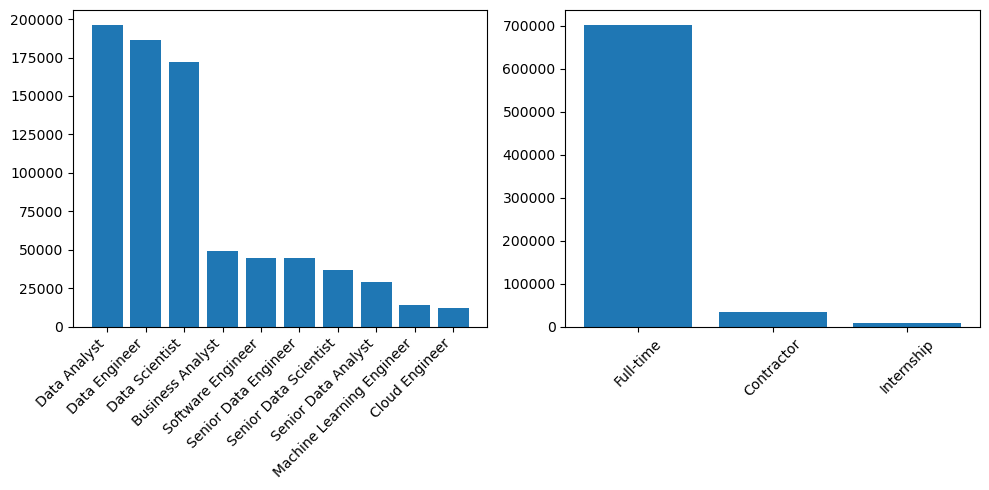

In [43]:
# couldn't rotate the xticks of the first graph so this how to do that:


fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figure size if needed figsiz= width, length

# First bar plot
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[0].set_xticklabels(df['job_title_short'].value_counts().index, rotation=45, ha='right')

# Second bar plot
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
ax[1].set_xticklabels(df['job_schedule_type'].value_counts().head(3).index, rotation=45)

plt.tight_layout()
plt.show()


In [13]:
df_exploded= df.explode('job_skills').copy()

If you want the results as a DataFrame instead of a Series, you can use `.reset_index(name='count')`:

In [69]:
skill_count = df_exploded.groupby(by=['job_skills','job_title_short']).size()
skill_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [71]:
df_skills = skill_count.reset_index(name='skill_count') # because it was grouped by a list, the index was the size aggregate so reseting the index enabled me to change it's name.  
df_skills

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [117]:
df_skills.sort_values('skill_count', ascending=False, inplace=True)
df_skills

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
293,codecommit,Business Analyst,1
2175,wimi,Data Scientist,1
2173,webex,Senior Data Scientist,1
797,heroku,Senior Data Analyst,1


enumerate on a list provides an index back; usually used with a loop using two variables one for the index and one for the actual values in the list.

In [106]:
# just so that I remeber
for i, job_title in enumerate(job_titles):
    print(i,job_title)

0 Senior Data Engineer
1 Data Analyst
2 Data Engineer


In [108]:
for i, job_title in enumerate(job_titles):
    print(df_skills[df_skills['job_title_short'] == job_title ].head(5))

     job_skills       job_title_short  skill_count
1483     python  Senior Data Engineer        28884
1826        sql  Senior Data Engineer        28594
145         aws  Senior Data Engineer        19332
155       azure  Senior Data Engineer        16177
1776      spark  Senior Data Engineer        16046
     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656


# Should write all again, I've made some mistakes which was not identified.

In [18]:
df_exploded.groupby(by= ['job_title_short', 'job_skills']).size()

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

Above, `job_title_short` and `job_skills` are the MultiIndex, and the count is the Series' values.

In [25]:
df_skills = df_exploded.groupby(by= ['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_skills.sort_values('skill_count',ascending=False, inplace=True)
df_skills

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [ ]:
# to create a list to enumerate through
job_titles = df['job_title_short'].value_counts().sort_values(ascending=False).index.tolist()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Machine Learning Engineer',
 'Cloud Engineer']

Now, `job_title_short` and `job_skills` are back as normal columns, and count is explicitly named and included as a column instead of being part of the index.
So, the reason the count column appears as an index initially is that `.size()` returns a Series, where the index is formed by the grouped columns, and the values represent the count. Resetting the index moves these index values back into regular columns and enables me to name the last column in the series.

In [28]:
# I want only three in my case.
job_titles = job_titles[:3]
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

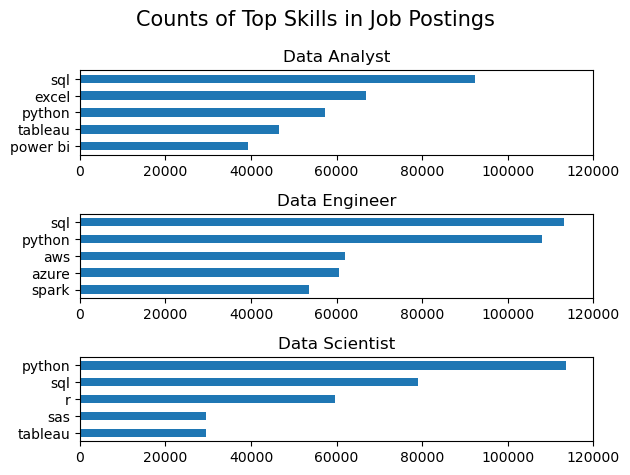

In [43]:
fig, ax = plt.subplots(len(job_titles),1)

for i , jobtitle in enumerate(job_titles):
    df_plot = df_skills[df_skills['job_title_short'] == jobtitle].head(5)
    df_plot.plot(kind='barh', y= 'skill_count',x= 'job_skills', ax = ax[i], title=jobtitle, legend= False) # The x='column_name' and y= 'column_name' because this is pandas.plot
    # on barh the x is the vertical axis and the y is the horizontal one 
    ax[i].set_ylabel('')  # .set_label() not .ylabel()
    ax[i].invert_yaxis()  # didn't need .gca because the location is known already.
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
    

In [ ]:
fig, ax = plt.subplots(len(job_titles),1)
for i , jobtitle in enumerate(job_titles):
    df_plot = df_skills[df_skills['job_title_short'] == jobtitle].head(5)
    df_plot.plot(kind='bar', x= 'skill_count', y= 'job_skills', ax = ax[i], title=jobtitle)

### Mistakes I made while building the graph:
1- Incorrect column for y axis

- You are using `'job_skills'` as the `y` value, but it might not be a **numeric column**.
- `y` should typically be a numeric column, while `x` should be categorical if you're making a bar plot.

2- Swapped `x` and `y` arguments

- The x-axis should typically be categorical (text), and the y-axis should be numeric.
- You currently have:
    - `df_plot.plot(kind='bar', x='skill_count', y='job_skills', ...)`
    - This means `skill_count` is on the **x-axis**, which is likely wrong.



barh is the reverse axises of bar